In [258]:
#import packages
import pandas as pd
import numpy as np
import GEOparse
from IPython.display import display
from sklearn import preprocessing
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt 
import operator
import collections
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import LeaveOneOut, StratifiedKFold
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, chi2, f_classif
from imblearn.over_sampling import SMOTE
from itertools import cycle
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.neural_network import MLPClassifier
#from keras.layers import Dense, Activation
#from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
   

# Machine Learning

In [259]:

#upload count matrix manually downloaded from GEO website
path = "C:/Users/catia/Downloads"

rna_seq_tmp = pd.read_csv("GSE157103_genes.tpm.tsv", sep='\t', index_col = 0)
rna_seq_tmp.head(10)


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,NC17,NC18,NC19,NC20,NC21,NC22,NC23,NC24,NC25,NC26
#symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.49,0.29,0.26,0.45,0.17,0.21,0.49,0.12,0.51,0.10,...,0.37,0.33,0.25,0.20,0.40,0.30,0.70,0.75,2.80,0.22
A1CF,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
A2M,0.21,0.14,0.03,0.09,0.00,0.08,0.23,0.08,0.88,0.13,...,0.07,0.06,0.11,0.01,0.04,0.02,0.02,0.27,0.04,0.28
A2ML1,0.04,0.00,0.02,0.07,0.05,0.04,0.03,0.01,0.02,0.01,...,0.01,0.00,0.00,0.02,0.02,0.02,0.01,0.00,0.00,0.00
A3GALT2,0.07,0.00,0.00,0.00,0.07,0.00,0.07,0.00,0.79,0.15,...,0.18,0.00,0.04,0.00,0.00,0.00,0.00,0.06,0.00,0.00
A4GALT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.03,0.07,0.00,0.00,0.00,0.00,0.00,0.00
A4GNT,0.03,0.05,0.07,0.00,0.00,0.03,0.00,0.00,0.00,0.12,...,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00
AAAS,18.92,18.68,13.85,22.11,8.45,19.60,28.59,10.50,22.78,15.47,...,16.31,10.98,11.28,13.57,24.83,17.06,20.31,27.25,21.64,5.54
AACS,4.07,3.00,1.83,4.22,1.17,3.15,4.24,2.10,4.86,2.90,...,2.47,1.60,1.30,2.00,2.74,1.96,1.54,3.42,1.43,0.35


In [260]:
rna_seq_tmp.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,NC17,NC18,NC19,NC20,NC21,NC22,NC23,NC24,NC25,NC26
count,19472.000000,19472.000000,19472.000000,19472.000000,19472.00000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,...,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000
mean,51.355792,51.355807,51.355800,51.355776,51.35579,51.355798,51.355831,51.355772,51.355802,51.355780,...,51.355811,51.355826,51.355812,51.355806,51.355813,51.355806,51.355781,51.355760,51.355786,51.355801
std,734.265978,762.410285,1075.540652,562.286149,1270.47109,969.987686,610.497078,1170.344865,822.714316,1210.562129,...,822.491085,1404.443711,1671.988592,1222.687347,844.811035,1430.460664,1012.686897,582.169481,738.260501,2289.741419
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030000,0.040000,0.020000,0.050000,0.02000,0.040000,0.060000,0.020000,0.030000,0.030000,...,0.040000,0.010000,0.010000,0.020000,0.020000,0.020000,0.020000,0.040000,0.010000,0.000000
50%,2.470000,2.460000,1.250000,2.965000,1.20500,2.190000,3.390000,1.410000,2.300000,1.690000,...,2.120000,0.925000,0.840000,1.170000,1.350000,0.810000,1.110000,2.090000,0.845000,0.420000
75%,17.182500,15.220000,10.690000,17.962500,10.26000,13.432500,18.892500,11.062500,14.980000,11.552500,...,14.792500,7.910000,7.320000,9.330000,9.540000,6.290000,9.040000,13.832500,6.620000,3.810000
max,64587.480000,69854.370000,96300.100000,33241.960000,144022.37000,111117.870000,37363.310000,114337.660000,75816.480000,118469.710000,...,64139.120000,129223.410000,178089.380000,112675.860000,72568.800000,166457.610000,96057.980000,33537.920000,42750.970000,271839.830000


In [261]:
#download and load to the memory the experiment with specific GEO accession
gse157103 = GEOparse.get_GEO("GSE157103")

29-Jan-2021 14:32:31 DEBUG utils - Directory ./ already exists. Skipping.
29-Jan-2021 14:32:31 INFO GEOparse - File already exist: using local version.
29-Jan-2021 14:32:31 INFO GEOparse - Parsing ./GSE157103_family.soft.gz: 
29-Jan-2021 14:32:31 DEBUG GEOparse - DATABASE: GeoMiame
29-Jan-2021 14:32:31 DEBUG GEOparse - SERIES: GSE157103
29-Jan-2021 14:32:31 DEBUG GEOparse - PLATFORM: GPL24676
29-Jan-2021 14:32:31 DEBUG GEOparse - SAMPLE: GSM4753021
29-Jan-2021 14:32:31 DEBUG GEOparse - SAMPLE: GSM4753022
29-Jan-2021 14:32:31 DEBUG GEOparse - SAMPLE: GSM4753023
29-Jan-2021 14:32:31 DEBUG GEOparse - SAMPLE: GSM4753024
29-Jan-2021 14:32:31 DEBUG GEOparse - SAMPLE: GSM4753025
29-Jan-2021 14:32:31 DEBUG GEOparse - SAMPLE: GSM4753026
29-Jan-2021 14:32:31 DEBUG GEOparse - SAMPLE: GSM4753027
29-Jan-2021 14:32:31 DEBUG GEOparse - SAMPLE: GSM4753028
29-Jan-2021 14:32:31 DEBUG GEOparse - SAMPLE: GSM4753029
29-Jan-2021 14:32:31 DEBUG GEOparse - SAMPLE: GSM4753030
29-Jan-2021 14:32:31 DEBUG GEOpars

In [262]:
#access to metadata
metadata = gse157103.phenotype_data
metadata.head(35)
#type(metadata)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,relation,supplementary_file_1,series_id,data_row_count,characteristics_ch1.14.fibrinogen,characteristics_ch1.15.sofa,characteristics_ch1.16.associated controlled-vocabulary terms,characteristics_ch1.17.cell type,characteristics_ch1.18.tissue of origin,characteristics_ch1.19.sample type
GSM4753021,COVID_01_39y_male_NonICU,GSM4753021,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753022,COVID_02_63y_male_NonICU,GSM4753022,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753023,COVID_03_33y_male_NonICU,GSM4753023,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753024,COVID_04_49y_male_NonICU,GSM4753024,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753025,COVID_05_49y_male_NonICU,GSM4753025,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753026,COVID_06_:y_male_NonICU,GSM4753026,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753027,COVID_07_38y_female_NonICU,GSM4753027,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753028,COVID_08_78y_male_ICU,GSM4753028,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753029,COVID_09_64y_female_ICU,GSM4753029,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN
GSM4753030,COVID_10_62y_male_ICU,GSM4753030,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,9606,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
print(metadata.columns)

Index(['title', 'geo_accession', 'status', 'submission_date',
       'last_update_date', 'type', 'channel_count', 'source_name_ch1',
       'organism_ch1', 'taxid_ch1', 'characteristics_ch1.0.disease state',
       'characteristics_ch1.1.age (years)', 'characteristics_ch1.2.Sex',
       'characteristics_ch1.3.icu', 'characteristics_ch1.4.apacheii',
       'characteristics_ch1.5.charlson score',
       'characteristics_ch1.6.mechanical ventilation',
       'characteristics_ch1.7.ventilator-free days',
       'characteristics_ch1.8.dm',
       'characteristics_ch1.9.hospital-free days post 45 day followup (days)',
       'characteristics_ch1.10.ferritin (ng/ml)',
       'characteristics_ch1.11.crp (mg/l)',
       'characteristics_ch1.12.ddimer (mg/l_feu)',
       'characteristics_ch1.13.procalcitonin (ng/ml)',
       'characteristics_ch1.14.lactate (mmol/l)',
       'characteristics_ch1.15.fibrinogen', 'characteristics_ch1.16.sofa',
       'characteristics_ch1.17.associated controlled-vo

In [264]:
data_scaled = preprocessing.scale(rna_seq_tmp)


# Machine Learning Models

In order to predict and help to classify data from our study, we have decided to create and evaluate machine learning models with the following end points:

Qualitative Variable
- Disease State -> Binary

Severity Indexes
- Apache II -> Numeric
- Apache II -> Multiclass

Biomarkers
- Ferritin -> Numeric

## Disease State

As the number of cases to test for Coronavirus is increasing rapidly day by day, it is impossible to test due to the time and cost factors. Over recent years, machine learning has turned very reliable in the medical field. Using machine learning to predict COVID-19 in patients will reduce the time delay for the results of the medical tests and modulate health workers to give proper medical treatment to them.

The main goal of this analysis is to develop a machine learning model that could preidict whether a patient is suffering from COVID-19.
To create the models we have split the omic data provided in to train and test datasets, where the former corresponds to 1/5 of the full data (Train and Test split section).

We also selected 30% of the features in our dataset (Feature Selection section) to reduce dimensionality and possibly improve our models.

For this end point we have performed:

- Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Naive Bayes
- Random Forest
- Decision Tree

We performed cross-validation for each of our models and computed the resulting metrics from the test set prediction.

Train and Test split

In [265]:
disease_state=[]
for j in metadata["characteristics_ch1.0.disease state"]:
    if j == 'COVID-19':
        disease_state.append(int(1))
    if j == 'non-COVID-19':
        disease_state.append(int(0))
   
metadata['disease_state'] = disease_state

disease_state = metadata['disease_state']

ind = list(range(126))
np.random.seed(0)
indices = np.random.permutation(126)
data_scaled = data_scaled.T
train = data_scaled[ind]
x_train = train[indices[:-25]]
y_train = disease_state.iloc[indices[:-25]].values
x_test = data_scaled[indices[-25:]]
y_test = disease_state.iloc[indices[-25:]].values


In [266]:
print(data_scaled.shape)
print(y_test.shape)

(126, 19472)
(25,)


Feature Selection

In [267]:
selector = SelectPercentile(f_classif, percentile = 30)
train_select = selector.fit_transform(x_train, y_train)
index_top_feat = selector.get_support(indices= True)
print('Number of features selected:', index_top_feat.shape)

testin = x_test[:,index_top_feat]
testin.shape

Number of features selected: (5842,)


(25, 5842)

### Logistic regression

In [268]:
lr = LogisticRegression(max_iter = 101, random_state = 0, solver = 'liblinear')
lr.fit(train_select, y_train)

y_pred = lr.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)) + '\n')

Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0
Confusion Matrix : 
[[ 8  0]
 [ 0 17]]



Cross Validation

In [269]:
accuracy = cross_val_score (estimator =  lr, X = train_select, y = y_train , cv = 5, n_jobs = -1)
print(f"Accuracy Scores: {accuracy} \n")
print(f'Accuracy Scores mean: {accuracy.mean()}')
print(f'Accuracy Scores sd: {accuracy.std()}')

Accuracy Scores: [0.95238095 0.9        0.9        0.85       0.9       ] 

Accuracy Scores mean: 0.9004761904761904
Accuracy Scores sd: 0.03238095238095237


ROC curve, Precision-Recall curve and AUC

NO SKILL: ROC AUC=0.500
Linear Regression: ROC AUC=1.000
Logistic:  Precision-Recall f1=1.000 auc=1.000


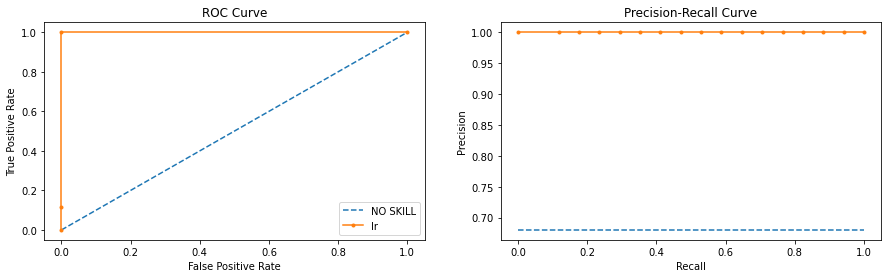

In [270]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

ns_probs = [1 for _ in range(len(y_test))]

lr_probs = lr.predict_proba(testin)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_roc_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('NO SKILL: ROC AUC=%.3f' % (ns_auc))
print('Linear Regression: ROC AUC=%.3f' % (lr_roc_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='NO SKILL')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='lr')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend()

#Precision-Recall Curve
predd = lr.predict(testin)

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, predd), auc(lr_recall, lr_precision)

print('Logistic:  Precision-Recall f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

no_model = len(y_test[y_test==1]) / len(y_test)
ax2.plot([0, 1], [no_model, no_model], linestyle='--', label='NO SKILL')
ax2.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
plt.show()

### K-Nearest Neighbors (KNN)

In [271]:
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
knn.fit(train_select, y_train)

y_pred = knn.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Confusion Matrix : \n ' + str(confusion_matrix(y_test,y_pred)) + '\n')

Accuracy Score : 0.84
Precision Score : 0.9333333333333333
Recall Score : 0.8235294117647058
F1 Score : 0.8749999999999999
Confusion Matrix : 
 [[ 7  1]
 [ 3 14]]



Cross Validation

In [272]:
accuracy = cross_val_score (estimator =  knn, X = train_select, y = y_train, cv = 5, n_jobs = -1)
print(f"Accuracy Scores: {accuracy} \n")
print(f'Accuracy Scores mean: {accuracy.mean()}')
print(f'Accuracy Scores std: {accuracy.std()}')

Accuracy Scores: [0.85714286 0.65       0.8        0.75       0.65      ] 

Accuracy Scores mean: 0.7414285714285713
Accuracy Scores std: 0.08199054201303851


ROC curve, Precision-Recall curve and AUC

NO SKILL: ROC AUC=0.500
KNN: ROC AUC=0.893
Logistic:  Precision-Recall f1=0.875 auc=0.950


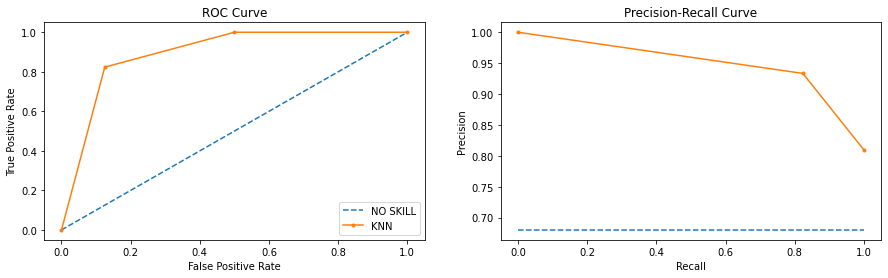

In [273]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

ns_probs = [1 for _ in range(len(y_test))]

knn_probs = knn.predict_proba(testin)
knn_probs = knn_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
knn_roc_auc = roc_auc_score(y_test, knn_probs)

# summarize scores
print('NO SKILL: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (knn_roc_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='NO SKILL')
ax1.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend()

#Precision-Recall Curve
predd = knn.predict(testin)

knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
knn_f1, knn_auc = f1_score(y_test, predd), auc(knn_recall, knn_precision)

print('Logistic:  Precision-Recall f1=%.3f auc=%.3f' % (knn_f1, knn_auc))

no_model = len(y_test[y_test==1]) / len(y_test)
ax2.plot([0, 1], [no_model, no_model], linestyle='--', label='NO SKILL')
ax2.plot(knn_recall, knn_precision, marker='.', label='k-nearest neighbors')

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
plt.show()

### Support Vector Machine (SVM)

In [274]:
svm = SVC(kernel = 'linear', random_state = 0, probability = True)
svm.fit(train_select, y_train)

y_pred = svm.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Confusion Matrix : \n ' + str(confusion_matrix(y_test,y_pred)) + '\n')
accuracy_svm = accuracy_score(y_test,y_pred)
precision_svm = precision_score(y_test,y_pred)
recall_svm = recall_score(y_test,y_pred)
f1_svm = f1_score(y_test,y_pred)

Accuracy Score : 0.96
Precision Score : 0.9444444444444444
Recall Score : 1.0
F1 Score : 0.9714285714285714
Confusion Matrix : 
 [[ 7  1]
 [ 0 17]]



#### Cross Validation

In [275]:
accuracy = cross_val_score (estimator =  svm, X = train_select, y = y_train, cv = 5, n_jobs = -1)
print(f"Accuracy Scores: {accuracy} \n")
print(f'Accuracy Scores mean: {accuracy.mean()}')
print(f'Accuracy Scores std: {accuracy.std()}')

Accuracy Scores: [0.85714286 0.95       0.85       0.9        0.9       ] 

Accuracy Scores mean: 0.8914285714285715
Accuracy Scores std: 0.035970509462897635


##### ROC curve, Precision-Recall curve and AUC

NO SKILL: ROC AUC=0.500
SVM: ROC AUC=1.000
Logistic:  Precision-Recall f1=0.971 auc=1.000


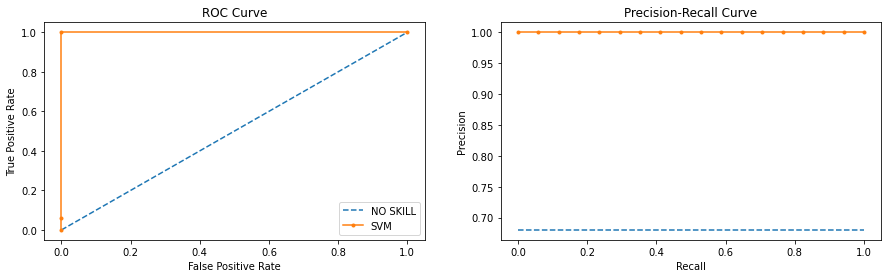

In [276]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

ns_probs = [1 for _ in range(len(y_test))]

svm_probs = svm.predict_proba(testin)
svm_probs = svm_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
svm_roc_auc = roc_auc_score(y_test, svm_probs)

# summarize scores
print('NO SKILL: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (svm_roc_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='NO SKILL')
ax1.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend()

#Precision-Recall Curve
predd = svm.predict(testin)

svm_precision,svm_recall, _ = precision_recall_curve(y_test, svm_probs)
svm_f1, svm_auc = f1_score(y_test, predd), auc(svm_recall, svm_precision)

print('Logistic:  Precision-Recall f1=%.3f auc=%.3f' % (svm_f1, svm_auc))

no_model = len(y_test[y_test==1]) / len(y_test)
ax2.plot([0, 1], [no_model, no_model], linestyle='--', label='NO SKILL')
ax2.plot(svm_recall, svm_precision, marker='.', label='Support-Vector Machines')

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
plt.show()



### Hyperparameter optimization

Hperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process.

In [277]:
model = SVC(kernel = 'linear', random_state = 0, probability = True)

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3) 

grid = grid.fit(train_select, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.810, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.850, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.850, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.800, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.800, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.810, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.850, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.850, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.800, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.810, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.850, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.850, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.800, total=   0.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.800, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.905, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.700, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.850, total=   0.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.850, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.905, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.750, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.800, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.800, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.950, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   31.6s finished


In [278]:
# print best parameter after tuning 
print('Best Parameters:', grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print('Best model:', grid.best_estimator_)

Best Parameters: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Best model: SVC(C=10, gamma=0.0001, probability=True, random_state=0)


In [279]:
model_hyper = SVC(C=1000, gamma=0.0001, probability=True, random_state=0)
model_hyper.fit(train_select, y_train)

y_pred = model_hyper.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred, average='weighted')))
print('Recall Score : ' + str(recall_score(y_test,y_pred, average='weighted')))
print('F1 Score : ' + str(f1_score(y_test,y_pred, average='weighted')))
print('Confusion Matrix : \n ' + str(confusion_matrix(y_test,y_pred)) + '\n')
accuracy_hyper = accuracy_score(y_test,y_pred)
precision_hyper = precision_score(y_test,y_pred, average='weighted')
recall_hyper = recall_score(y_test,y_pred, average='weighted')
f1_hyper = f1_score(y_test,y_pred, average='weighted')

Accuracy Score : 0.88
Precision Score : 0.8787301587301587
Recall Score : 0.88
F1 Score : 0.8777142857142857
Confusion Matrix : 
 [[ 6  2]
 [ 1 16]]



In [280]:
accuracy = cross_val_score (estimator =  model_hyper, X = train_select, y = y_train, cv = 5, n_jobs = -1)
print(f"Accuracy Scores: {accuracy} \n")
print(f'Accuracy Scores mean: {accuracy.mean()}')
print(f'Accuracy Scores std: {accuracy.std()}')

Accuracy Scores: [0.9047619 0.75      0.8       0.8       0.95     ] 

Accuracy Scores mean: 0.840952380952381
Accuracy Scores std: 0.07428266171994338


In [281]:
print('SVM:', 'accuracy:', accuracy_svm, 'precision:', precision_svm,  'recall:', recall_svm, 'f1_SCORE:', f1_svm)
print('SVM_Hyper:', 'accuracy:', accuracy_hyper, 'precision:', precision_hyper,  'recall:', recall_hyper, 'f1_SCORE:', f1_hyper)

SVM: accuracy: 0.96 precision: 0.9444444444444444 recall: 1.0 f1_SCORE: 0.9714285714285714
SVM_Hyper: accuracy: 0.88 precision: 0.8787301587301587 recall: 0.88 f1_SCORE: 0.8777142857142857


We also implemented Hyperparameter optimization  to improve our results. However, no improvement was observed.

### Naive Bayes

In [282]:
nb = GaussianNB()
nb.fit(train_select, y_train)

y_pred = nb.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Confusion Matrix : \n ' + str(confusion_matrix(y_test,y_pred)) + '\n')

Accuracy Score : 0.88
Precision Score : 1.0
Recall Score : 0.8235294117647058
F1 Score : 0.9032258064516129
Confusion Matrix : 
 [[ 8  0]
 [ 3 14]]



##### Cross Validation

In [283]:
accuracy = cross_val_score (estimator =  nb, X = train_select, y = y_train, cv = 5, n_jobs = -1)
print(f"Accuracy Scores: {accuracy} \n")
print(f'Accuracy Scores mean: {accuracy.mean()}')
print(f'Accuracy Scores std: {accuracy.std()}')

Accuracy Scores: [0.85714286 0.85       0.8        0.85       0.6       ] 

Accuracy Scores mean: 0.7914285714285715
Accuracy Scores std: 0.09787538933120365


##### ROC curve, Precision-Recall curve and AUC

NO SKILL: ROC AUC=0.500
NB: ROC AUC=0.912
Logistic:  Precision-Recall f1=0.903 auc=0.969


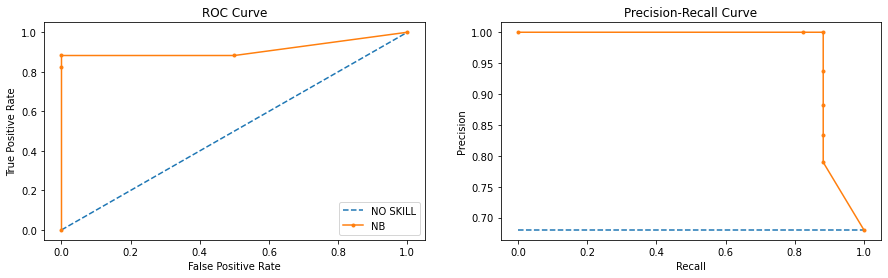

In [284]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

ns_probs = [1 for _ in range(len(y_test))]

nb_probs = nb.predict_proba(testin)
nb_probs = nb_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
nb_roc_auc = roc_auc_score(y_test, nb_probs)

# summarize scores
print('NO SKILL: ROC AUC=%.3f' % (ns_auc))
print('NB: ROC AUC=%.3f' % (nb_roc_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='NO SKILL')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='NB')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend()

#Precision-Recall Curve
predd = nb.predict(testin)

nb_precision,nb_recall, _ = precision_recall_curve(y_test, nb_probs)
nb_f1, nb_auc = f1_score(y_test, predd), auc(nb_recall, nb_precision)

print('Logistic:  Precision-Recall f1=%.3f auc=%.3f' % (nb_f1, nb_auc))

no_model = len(y_test[y_test==1]) / len(y_test)
ax2.plot([0, 1], [no_model, no_model], linestyle='--', label='NO SKILL')
ax2.plot(nb_recall, nb_precision, marker='.', label='Naive Bayes classifiers')

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
plt.show()

### Random Forest

In [285]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(train_select, y_train)

y_pred = rf.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Confusion Matrix : \n ' + str(confusion_matrix(y_test,y_pred)) + '\n')

Accuracy Score : 0.84
Precision Score : 0.8095238095238095
Recall Score : 1.0
F1 Score : 0.8947368421052632
Confusion Matrix : 
 [[ 4  4]
 [ 0 17]]



##### Cross Validation

In [286]:
accuracy = cross_val_score (estimator =  rf, X = train_select, y = y_train, cv = 5, n_jobs = -1)
print(f"Accuracy Scores: {accuracy} \n")
print(f'Accuracy Scores mean: {accuracy.mean()}')
print(f'Accuracy Scores std: {accuracy.std()}')

Accuracy Scores: [0.9047619 0.7       0.8       0.9       0.75     ] 

Accuracy Scores mean: 0.8109523809523811
Accuracy Scores std: 0.08108672326184113


##### ROC curve, Precision-Recall curve and AUC

NO SKILL: ROC AUC=0.500
RF: ROC AUC=0.886
Logistic:  Precision-Recall f1=0.895 auc=0.938


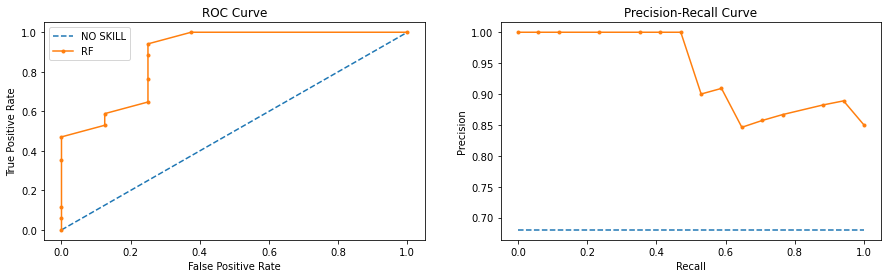

In [287]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

rf_probs = [1 for _ in range(len(y_test))]

rf_probs = rf.predict_proba(testin)
rf_probs = rf_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
rf_roc_auc = roc_auc_score(y_test, rf_probs)

# summarize scores
print('NO SKILL: ROC AUC=%.3f' % (ns_auc))
print('RF: ROC AUC=%.3f' % (rf_roc_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='NO SKILL')
ax1.plot(rf_fpr, rf_tpr, marker='.', label='RF')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend()

#Precision-Recall Curve
predd = rf.predict(testin)

rf_precision, rf_recall, _ = precision_recall_curve(y_test,rf_probs)
rf_f1, rf_auc = f1_score(y_test, predd), auc(rf_recall, rf_precision)

print('Logistic:  Precision-Recall f1=%.3f auc=%.3f' % (rf_f1, rf_auc))

no_model = len(y_test[y_test==1]) / len(y_test)
ax2.plot([0, 1], [no_model, no_model], linestyle='--', label='NO v')
ax2.plot(rf_recall, rf_precision, marker='.', label='Random forest')

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
plt.show()

### Decision Tree

In [288]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(train_select, y_train)

y_pred = dt.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Confusion Matrix : \n ' + str(confusion_matrix(y_test,y_pred)) + '\n')

Accuracy Score : 0.88
Precision Score : 0.8888888888888888
Recall Score : 0.9411764705882353
F1 Score : 0.9142857142857143
Confusion Matrix : 
 [[ 6  2]
 [ 1 16]]



##### Cross Validation

In [289]:
accuracy = cross_val_score (estimator =  dt, X = train_select, y = y_train, cv = 5, n_jobs = -1)
print(f"Accuracy Scores: {accuracy} \n")
print(f'Accuracy Scores mean: {accuracy.mean()}')
print(f'Accuracy Scores std: {accuracy.std()}')

Accuracy Scores: [0.85714286 0.7        0.85       0.9        0.75      ] 

Accuracy Scores mean: 0.8114285714285714
Accuracy Scores std: 0.07431318173508546


##### ROC curve, Precision-Recall curve and AUC

NO SKILL: ROC AUC=0.500
DT: ROC AUC=0.846
Logistic:  Precision-Recall f1=0.914 auc=0.935


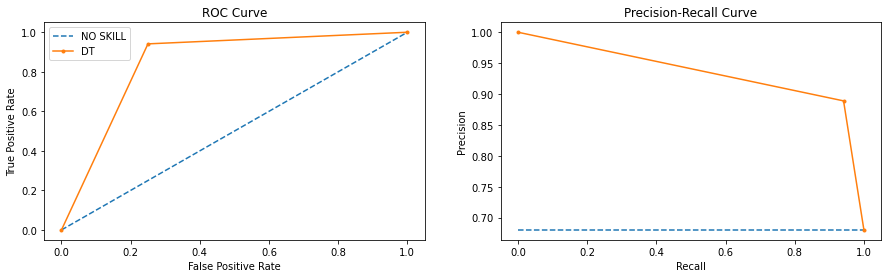

In [290]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

dt_probs = [1 for _ in range(len(y_test))]

dt_probs = dt.predict_proba(testin)
dt_probs = dt_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
dt_roc_auc = roc_auc_score(y_test, dt_probs)

# summarize scores
print('NO SKILL: ROC AUC=%.3f' % (ns_auc))
print('DT: ROC AUC=%.3f' % (dt_roc_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='NO SKILL')
ax1.plot(dt_fpr, dt_tpr, marker='.', label='DT')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend()

#Precision-Recall Curve
predd = dt.predict(testin)

dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs)
dt_f1, dt_auc = f1_score(y_test, predd), auc(dt_recall, dt_precision)

print('Logistic:  Precision-Recall f1=%.3f auc=%.3f' % (dt_f1, dt_auc))

no_model = len(y_test[y_test==1]) / len(y_test)
ax2.plot([0, 1], [no_model, no_model], linestyle='--', label='NO SKILL')
ax2.plot(dt_recall, dt_precision, marker='.', label='Decision tree')

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
plt.show()

### Summary
We have compiled a summary of the AUC results from the different models.

In [291]:
models = {'Logistic Regression' : (lr_f1, lr_roc_auc, lr_auc), 'KNN': (knn_f1, knn_roc_auc, knn_auc), 'SVM': (svm_f1, svm_roc_auc, svm_auc), 'Naive Bayes' : (nb_f1, nb_roc_auc, nb_auc), 'Random Forest':(rf_f1, rf_roc_auc,  rf_auc), 'Decision Tree': (dt_f1, dt_roc_auc, dt_auc)}

for i in models:
    print(i, ' F1=%.3f' % (models[i][0]), ' : ROC AUC=%.3f' % (models[i][1]), ' : Precision-Recall AUC=%.3f' % (models[i][2]))

Logistic Regression  F1=1.000  : ROC AUC=1.000  : Precision-Recall AUC=1.000
KNN  F1=0.875  : ROC AUC=0.893  : Precision-Recall AUC=0.950
SVM  F1=0.971  : ROC AUC=1.000  : Precision-Recall AUC=1.000
Naive Bayes  F1=0.903  : ROC AUC=0.912  : Precision-Recall AUC=0.969
Random Forest  F1=0.895  : ROC AUC=0.886  : Precision-Recall AUC=0.938
Decision Tree  F1=0.914  : ROC AUC=0.846  : Precision-Recall AUC=0.935


### Discussion

Examination of the individual predictions from the distinct models, allowed us to identify that the majority predicts correctly the patients' health status. 
In the case, of the F1 Score the the values varies between 0.875-1.000 , that shows the precision and recall of the test. 
The precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly. 
The recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive.
This way the use of a combination of the two is useful when analyzing imbalanced observations.

We also performed Receiver Operating Characteristics (ROC), Precision-Recall and respective Area Under Curve (AUC) . 
This results have been plotted in ROC curve and Precision-Recall curve of each model. 
In the case of ROC AUC the the values varies between 0.846 - 1.000 and  the Precision-Recall AUC values between 0.935-1.000.
Higher values of the AUC, the better the model is, this implies that the models presented perform mostly correct predictions.

In the case of the precision-recall curve, that show the precision/recall of the classification models in comparison to a no 
skill classifier: we also verify  that Logistic Regression and SVM shows the higher area under the precision-recall curve meaning a better model. In the  case of SVM model we also implemented Hyperparameter optimization  to improve our results. However, no improvement was observed.

Having this into account, we have determined the Logistic Regression model has the higher AUC value in ROC and Precission-Recall and also has the higher F1 value, when compared to the other models.  Also, the metrics of this model are all 1.00, than it was possible to predict correctly all disease state from the pacients.
Therefore we belive Logistic Regressio model is the best model for this end point.

## DISEASE STATE - BEST MODEL

In [165]:
best = lr

y_pred = best.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Confusion Matrix : \n ' + str(confusion_matrix(y_test,y_pred)) + '\n') 

Accuracy Score : 0.68
Precision Score : 0.68
Recall Score : 1.0
F1 Score : 0.8095238095238095
Confusion Matrix : 
 [[ 0  8]
 [ 0 17]]



In [166]:
accuracy = cross_val_score (estimator =  best, X = train_select, y = y_train, cv = 5, n_jobs = -1)
print(f"Accuracy Scores: {accuracy} \n")
print(f'Accuracy Scores mean: {accuracy.mean()}')
print(f'Accuracy Scores std: {accuracy.std()}')

Accuracy Scores: [0.80952381 0.85       0.85       0.8        0.8       ] 

Accuracy Scores mean: 0.8219047619047618
Accuracy Scores std: 0.02320176707634251


In [167]:
y_pred = best.predict(train_select)

print('Accuracy Score : ' + str(accuracy_score(y_train,y_pred)))
print('Precision Score : ' + str(precision_score(y_train,y_pred)))
print('Recall Score : ' + str(recall_score(y_train,y_pred)))
print('F1 Score : ' + str(f1_score(y_train,y_pred)))

print('Confusion Matrix : \n' + str(confusion_matrix(y_train,y_pred)) + '\n')

Accuracy Score : 0.8316831683168316
Precision Score : 0.83
Recall Score : 1.0
F1 Score : 0.9071038251366119
Confusion Matrix : 
[[ 1 17]
 [ 0 83]]



### Ensemble

In [292]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(max_iter = 150, random_state = 0)
clf2 = SVC(kernel = 'linear', random_state = 0, probability = True)
clf3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

ensemble= VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('dt', clf3)], voting='hard')

ensemble.fit(train_select, y_train)
y_pred = ensemble.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Confusion Matrix : \n ' + str(confusion_matrix(y_test,y_pred)) + '\n') 

C:\Users\catia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0
Confusion Matrix : 
 [[ 8  0]
 [ 0 17]]



We performed ensemble of the of the 3 best models for this end point. 
The models chosen were Logistic Regression, SVM and Decision Tree. 
The first two have the best accuracy and standart deviation in cross validation results while the latter one presents the best AUC in Precision-Recall graphs.

The Ensemble model presents the same results of the Logistic Regression model.

## APACHE II - Numeric

As the number of cases to test for Coronavirus is increasing rapidly day by day, it is impossible to test due to the time and cost factors. Over recent years, machine learning has turned very reliable in the medical field. Using machine learning to predict COVID-19 in patients will reduce the time delay for the results of the medical tests and modulate health workers to give proper medical treatment to them.

The main goal of this analysis is to develop a machine learning model with the ability to predict COVID-19 severity early on in admission would help clinicians prioritize patients for treatments
To create the models we have split the omic data provided in to train and test datasets, where the former corresponds to 1/5 of the full data (Train and Test split section).

We also selected 30% of the features in our dataset (Feature Selection section) to reduce dimensionality and possibly improve our models.

For this end point we have performed:

 - Linear Regression
 - Neural Network Regression
 - Support Vector Regression 
 - Random Forest Regression
 - Decision Tree Regression

We performed cross-validation for each of our models and computed the resulting metrics from the test set prediction. We determine R<sup>2</sup> (coefficient of determination), xplained Variance Scores, Median Absolute Error (MAE) and the  Median Squared Error (MSE) measures.



Train and Test split

In [168]:
metadata = metadata.reset_index()
metadata

,index,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,...,supplementary_file_1,series_id,data_row_count,characteristics_ch1.14.fibrinogen,characteristics_ch1.15.sofa,characteristics_ch1.16.associated controlled-vocabulary terms,characteristics_ch1.17.cell type,characteristics_ch1.18.tissue of origin,characteristics_ch1.19.sample type,disease_state
0,GSM4753021,COVID_01_39y_male_NonICU,GSM4753021,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,GSM4753022,COVID_02_63y_male_NonICU,GSM4753022,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,GSM4753023,COVID_03_33y_male_NonICU,GSM4753023,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN,1
3,GSM4753024,COVID_04_49y_male_NonICU,GSM4753024,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,GSM4753025,COVID_05_49y_male_NonICU,GSM4753025,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,GSM4753142,NONCOVID_22_63y_male_NonICU,GSM4753142,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN,0
122,GSM4753143,NONCOVID_23_42y_female_NonICU,GSM4753143,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN,0
123,GSM4753144,NONCOVID_24_32y_female_NonICU,GSM4753144,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN,0
124,GSM4753145,NONCOVID_25_62y_male_NonICU,GSM4753145,Public on Aug 29 2020,Aug 28 2020,Aug 29 2020,SRA,1,Leukocytes from whole blood,Homo sapiens,...,NONE,GSE157103,0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [169]:
print(data_scaled.shape)
print(y_test.shape)

(19472, 126)
(25,)


Feature Selection

In [170]:
metadata['characteristics_ch1.4.apacheii'] = pd.to_numeric(metadata['characteristics_ch1.4.apacheii'],errors='coerce')
np.random.seed(0)
apac = metadata['characteristics_ch1.4.apacheii'].dropna()

indices = np.random.permutation(len(data_scaled[apac.index]))
train = data_scaled[apac.index]

x_train = train[indices[:-25]]
y_train = apac.iloc[indices[:-25]]

x_test = data_scaled[indices[-25:]]
y_test = apac.iloc[indices[-25:]]

### Linear Regression

In [171]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)

y_pred = lreg.predict(x_test)

print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
lreg_r2 = r2_score(y_test, y_pred)

Explained Variance Score: -14162.702354841858
Mean Absolute Error: 376.3298341940839
Mean Squared Error: 853347.8832695489
R^2 : -14773.028449957561


##### Cross Validation

In [172]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  lreg, X = x_train, y = y_train, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
lreg_mse = mse.mean()

MSE: [-7.64683490e+04 -5.66514553e+05 -1.76046798e+02 -1.96832579e+04
 -1.25933686e+03] 

MSE mean: -132820.3086263194
MSE std: 218617.94174908675


##### Cross Validation

In [173]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  lreg, X = x_train, y = y_train, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
lreg_mse_over = mse.mean()

MSE: [-7.64683490e+04 -5.66611423e+05 -1.76046798e+02 -1.96832579e+04
 -1.25933686e+03] 

MSE mean: -132839.68277213277
MSE std: 218656.3762323834


### Neural Network Regression

In [174]:
data_scaled, apac = make_regression(n_samples = 126, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(data_scaled, apac, random_state=1)

regr = MLPRegressor(random_state=1, max_iter=3000).fit(x_train, y_train)
y_pred = regr.predict(x_test)

print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
regr_r2 = r2_score(y_test, y_pred)

Explained Variance Score: 0.1360393931163132
Mean Absolute Error: 173.43081819534473
Mean Squared Error: 46363.89494944419
R^2 : 0.1294933622056107


##### Cross Validation

In [175]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  regr, X = x_train, y = y_train, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
regr_mse = mse.mean()

MSE: [ 0.03073947  0.37564675 -0.07571365  0.13728398  0.11120648] 

MSE mean: 0.11583260572348193
MSE std: 0.14960999926694474


### Over-Sampling
We also implemented over-sampling to improve our results. 
We are passing floats to a classifier which expects categorical values as the target vector.  It would be better to convert your training scores by using scikit's labelEncoder function.

In [176]:
lab_enc = preprocessing.LabelEncoder()

y_encoded = lab_enc.fit_transform(y_train)

print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))


# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(x_train, y_encoded )


regr_over = MLPRegressor(random_state=1, max_iter=3000).fit(X, y)
y_pred = regr_over.predict(x_test)

print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
regr_r2_over = r2_score(y_test, y_pred)


continuous
multiclass
Explained Variance Score: 0.058124416457437156
Mean Absolute Error: 181.07489451321166
Mean Squared Error: 51740.34271725606
R^2 : 0.028547713123745377


##### Cross Validation

In [177]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  regr_over, X = X, y = y, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
regr_mse_over = mse.mean()

MSE: [ 0.05613635 -0.20450708 -0.38798823 -0.90700112 -0.12932618] 

MSE mean: -0.3145372527226936
MSE std: 0.3286996150638795


### Support Vector Regression 

In [178]:
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)

y_pred = svr.predict(x_test)

print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
svr_r2 = r2_score(y_test, y_pred)

Explained Variance Score: 0.002063453342000532
Mean Absolute Error: 182.22921292655553
Mean Squared Error: 53898.66217328174
R^2 : -0.011975875651525358


##### Cross Validation

In [179]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  svr, X = x_train, y = y_train, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
svr_mse = mse.mean()

MSE: [-0.00779796 -0.00330462 -0.05154368 -0.22694667 -0.00060086] 

MSE mean: -0.05803875845457544
MSE std: 0.08647675464225815


### Over-Sampling
We also implemented over-sampling to improve our results. 
We are passing floats to a classifier which expects categorical values as the target vector.  It would be better to convert your training scores by using scikit's labelEncoder function.

In [180]:
lab_enc = preprocessing.LabelEncoder()

y_encoded = lab_enc.fit_transform(y_train)

print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))


# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(x_train, y_encoded )

svr_over = SVR(kernel = 'rbf')
svr_over.fit(X, y)

y_pred = svr_over.predict(x_test)


print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
svr_r2_over = r2_score(y_test, y_pred)


continuous
multiclass
Explained Variance Score: 0.0020727934150380767
Mean Absolute Error: 191.54590194052966
Mean Squared Error: 56464.31284526155
R^2 : -0.06014732334062489


##### Cross Validation

In [181]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  svr_over, X = X, y = y, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
svr_mse_over = mse.mean()

MSE: [-0.00934841 -0.00168714 -0.05341242 -0.21014694  0.00913582] 

MSE mean: -0.05309181775292689
MSE std: 0.08135676776704433


### Random Forest Regression

In [182]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
rf_r2 = r2_score(y_test, y_pred)

Explained Variance Score: 0.5741710778015621
Mean Absolute Error: 133.340707115354
Mean Squared Error: 24298.261037641063
R^2 : 0.5437873038235563


##### Cross Validation

In [183]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  rf, X = x_train, y = y_train, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
rf_mse = mse.mean()

MSE: [ 0.20426904  0.06794108  0.10423717 -0.0607673   0.22023059] 

MSE mean: 0.10718211539885054
MSE std: 0.10194249805880426


### Over-Sampling
We also implemented over-sampling to improve our results. 
We are passing floats to a classifier which expects categorical values as the target vector.  It would be better to convert your training scores by using scikit's labelEncoder function.

In [184]:
lab_enc = preprocessing.LabelEncoder()

y_encoded = lab_enc.fit_transform(y_train)

print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))


# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(x_train, y_encoded )

rf_over = RandomForestRegressor()
rf_over.fit(X, y)

y_pred = rf_over.predict(x_test)

print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
rf_r2_over = r2_score(y_test, y_pred)


continuous
multiclass
Explained Variance Score: 0.08002089901553056
Mean Absolute Error: 185.93227063405425
Mean Squared Error: 52341.41020693751
R^2 : 0.017262353252650575


##### Cross Validation

In [185]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  rf_over, X = X, y = y, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
rf_mse_over = mse.mean()

MSE: [0.21062562 0.29012945 0.22147366 0.11494069 0.23496473] 

MSE mean: 0.21442682991848233
MSE std: 0.05677022273505444


### Decision Tree Regression

In [186]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
dt_r2 = r2_score(y_test, y_pred)

Explained Variance Score: 0.017763113106279094
Mean Absolute Error: 185.43717310794003
Mean Squared Error: 53016.3809732962
R^2 : 0.004589420293219515


#### Cross Validation

In [187]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  dt, X = x_train, y = y_train, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
dt_mse = mse.mean()

MSE: [ 0.51297628 -1.90470782 -1.61968066 -0.87278394 -0.88101254] 

MSE mean: -0.9530417361180155
MSE std: 0.8379635014233691


### Over-Sampling
We also implemented over-sampling to improve our results. 
We are passing floats to a classifier which expects categorical values as the target vector.  It would be better to convert your training scores by using scikit's labelEncoder function.

In [188]:
lab_enc = preprocessing.LabelEncoder()

y_encoded = lab_enc.fit_transform(y_train)

print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))


# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(x_train, y_encoded )

dt_over = DecisionTreeRegressor()
dt_over.fit(X, y)

y_pred = dt_over.predict(x_test)


print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
dt_r2_over = r2_score(y_test, y_pred)


continuous
multiclass
Explained Variance Score: 0.09202313104938731
Mean Absolute Error: 186.57693738014805
Mean Squared Error: 52037.09996488875
R^2 : 0.022975938919711503


##### Cross Validation

In [189]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  dt_over, X = X, y = y, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
dt_mse_over = mse.mean()

MSE: [-0.12877422  0.10680481 -1.09394531 -0.32448371 -0.85840028] 

MSE mean: -0.45975974095356487
MSE std: 0.4494334274089474


### Summary
We have compiled a summary of the results from the different models.

In [190]:
models = {'Linear Regression' : (lreg_r2, lreg_mse, lreg_mse_over), 'Neural Network Regression': ( regr_r2, regr_r2_over, regr_mse, regr_mse_over), 'Support Vector Regression': ( svr_r2, svr_r2_over, svr_mse, svr_mse_over), 'Random Forest Regression' : (rf_r2,rf_r2_over, rf_mse, rf_mse_over),  'Decision Tree Regression': (dt_r2, dt_r2_over, dt_mse, dt_mse_over)}

for i in models:
    print(i, ' R^2=%.3f ' % (models[i][0]), ' R^2 over=%.3f ' % (models[i][0]), ' : MSE=%.3f' % (models[i][1]), ' : MSE over=%.3f' % (models[i][1]))

Linear Regression  R^2=-14773.028   R^2 over=-14773.028   : MSE=-132820.309  : MSE over=-132820.309
Neural Network Regression  R^2=0.129   R^2 over=0.129   : MSE=0.029  : MSE over=0.029
Support Vector Regression  R^2=-0.012   R^2 over=-0.012   : MSE=-0.060  : MSE over=-0.060
Random Forest Regression  R^2=0.544   R^2 over=0.544   : MSE=0.017  : MSE over=0.017
Decision Tree Regression  R^2=0.005   R^2 over=0.005   : MSE=0.023  : MSE over=0.023


### Discussion
**R<sup>2</sup>**

In the models LR, SVR and DTR we have negative R<sup>2</sup> scores, which means that our models do not follow the tendency of our data.
In the other models de values of R<sup>2</sup> varies between 0.129-0.537. 
The coefficient of determination (R<sup>2</sup>) measures how well the model fits with the data, in this case the best model is Random Forest Regression. 
We also implemented over-sampling to improve our results. However, no improvement was observed.

**Explained Variance Scores**

The Explained Variance Scores measure how much our models take into account the variance of our data set.
In the case of LR and DTR the values are negative, so the models are nonspecific.
In the NNR and SVR are also very low, with low specification. The model with the best result is Random Forest Regression with a value of 0.568. 
We also implemented over-sampling to improve our results. However, no improvement was observed.

**MAE and MSE**

The mean absolute error (MAE) is a quantity used to measure how close predictions are to the outcomes. 
The mean absolute error is an average of the all absolute errors. 
The mean absolute error is a common measure of estimate error in time series analysis. The mean squared error of an estimator measures the average of the squares of the errors, which means the difference between the estimator and estimated.
MSE is a function, equivalent to the expected value of the squared error loss or quadratic loss. The difference occurs because of the randomness. The MSE is a measure of the quality of an estimator, it is always positive, and values which are closer to zero are better. 
Our MAE and MSE are also very high,  means our model prediction errors are too high for the predictions to be relevant.
We also implemented over-sampling to improve our results. However, no improvement was observed.


From our results we can acess that the model with the best results is the Random Forest Regression model, but this and the other regression models do not successfully fit with our data.
One possible reason for the bad scores can be the few training examples, overfitting, data imbalance, etc.

# Apache II (Multiclass)

In order to obtain better results we convert the APACHE II variable into a multiclass variable.
When G_1 includes values lower than 9, the G_2 values between 10-19, the G_3 values between 20-29 and G_4 values higher than 30. 

The main goal of this analysis is to develop a machine learning model with the ability to predict COVID-19 severity early on in admission would help clinicians prioritize patients for treatments. 
To create the models we have split the omic data provided in to train and test datasets, where the former corresponds to 1/5 of the full data (Train and Test split section).

We also selected 30% of the features in our dataset (Feature Selection section) to reduce dimensionality and possibly improve our models.

For this end point we have performed:

For this end point we have performed:

- Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Naive Bayes
- Random Forest
- Decision Tree

We performed cross-validation for each of our models and computed the resulting metrics from the test set prediction.


In [200]:
metadata['characteristics_ch1.4.apacheii'] = pd.to_numeric(metadata['characteristics_ch1.4.apacheii'],errors='coerce')

metadata['characteristics_ch1.4.apacheii']

0      15.0
1       NaN
2       NaN
3       NaN
4      19.0
       ... 
121     4.0
122     NaN
123     NaN
124     NaN
125    40.0
Name: characteristics_ch1.4.apacheii, Length: 126, dtype: float64

In [201]:
apach=[]
for j in metadata['characteristics_ch1.4.apacheii']:
    if j < 9:
        apach.append('G_1')
    elif j > 10 and j < 19:
        apach.append('G_2')
    elif j > 20 and j < 29:
        apach.append('G_3')
    elif j > 30 and j < 44:
        apach.append('G_4')
    else:
        apach.append('NA')
print(apach)

metadata['apacheii'] = apach

len(apach)

['G_2', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'G_4', 'G_4', 'G_4', 'NA', 'G_3', 'NA', 'G_3', 'G_3', 'NA', 'NA', 'NA', 'NA', 'G_1', 'NA', 'G_3', 'G_3', 'NA', 'G_2', 'G_2', 'NA', 'G_2', 'G_2', 'G_3', 'G_3', 'G_3', 'NA', 'NA', 'NA', 'G_3', 'NA', 'G_1', 'G_4', 'G_2', 'NA', 'G_3', 'G_3', 'G_3', 'G_2', 'G_2', 'G_3', 'G_4', 'G_2', 'G_4', 'NA', 'G_3', 'NA', 'G_4', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'G_3', 'G_2', 'G_3', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'G_3', 'NA', 'NA', 'G_3', 'NA', 'G_4', 'G_1', 'NA', 'NA', 'G_3', 'NA', 'NA', 'NA', 'G_2', 'NA', 'G_1', 'G_2', 'G_2', 'NA', 'G_3', 'G_2', 'NA', 'NA', 'NA', 'G_2', 'NA', 'G_2', 'NA', 'G_2', 'G_3', 'NA', 'NA', 'G_2', 'G_3', 'NA', 'NA', 'G_2', 'G_3', 'G_3', 'NA', 'NA', 'NA', 'G_2', 'NA', 'G_3', 'G_2', 'G_2', 'G_2', 'G_3', 'G_3', 'G_2', 'NA', 'G_1', 'NA', 'NA', 'NA', 'G_4']


126

In [202]:
from sklearn.preprocessing import label_binarize
np.random.seed(0)
apac = metadata[metadata['apacheii'] != 'NA']
apach = apac['apacheii']

indices = np.random.permutation(len(data_scaled[apach.index]))
data_scaled = preprocessing.scale(rna_seq_tmp)

data_scaled = data_scaled.T
print(data_scaled.shape)
train = data_scaled[apach.index]

train = data_scaled[ind]
x_train = train[indices[:-14]].tolist()
y_train = apach.iloc[indices[:-14]].values
x_test = data_scaled[indices[-14:]]
y_test = apach.iloc[indices[-14:]].values

(126, 19472)


In [203]:
print(data_scaled.shape)
print(y_test.shape)

(126, 19472)
(14,)


Feature Selection

In [204]:
selector = SelectPercentile(f_classif, percentile = 30)
train_select = selector.fit_transform(x_train, y_train)
index_top_feat = selector.get_support(indices= True)
print('Number of features selected:', index_top_feat.shape)

testin = x_test[:,index_top_feat]
testin.shape

Number of features selected: (5842,)


(14, 5842)

# Logistic regression

In [205]:
lr = LogisticRegression(max_iter = 101, random_state = 0, solver = 'liblinear')
lr.fit(train_select, y_train)

y_pred = lr.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred, average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred, average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred, average='micro')))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)) + '\n')


Accuracy Score : 0.35714285714285715
Precision Score : 0.35714285714285715
Recall Score : 0.35714285714285715
F1 Score : 0.35714285714285715
Confusion Matrix : 
[[0 0 0 0]
 [1 0 3 0]
 [1 2 4 1]
 [0 1 0 1]]



#### Cross Validation

In [206]:
accuracy = cross_val_score (estimator =  lr, X = train_select, y = y_train , cv = 5, n_jobs = -1)
print(f"Accuracy Scores: {accuracy} \n")
print(f'Accuracy Scores mean: {accuracy.mean()}')
print(f'Accuracy Scores sd: {accuracy.std()}')

Accuracy Scores: [0.54545455 0.4        0.4        0.4        0.3       ] 

Accuracy Scores mean: 0.40909090909090906
Accuracy Scores sd: 0.07841403146490117


# K-Nearest Neighbors (KNN)

In [207]:
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
knn.fit(train_select, y_train)

y_pred = knn.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred, average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred, average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred, average='micro')))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)) + '\n')

Accuracy Score : 0.21428571428571427
Precision Score : 0.21428571428571427
Recall Score : 0.21428571428571427
F1 Score : 0.21428571428571427
Confusion Matrix : 
[[0 0 0 0]
 [3 1 0 0]
 [1 6 1 0]
 [0 1 0 1]]



#### Cross Validation

In [208]:
accuracy = cross_val_score (estimator =  knn, X = train_select, y = y_train, cv = 5, n_jobs = -1)
print(f"Accuracy Scores: {accuracy} \n")
print(f'Accuracy Scores mean: {accuracy.mean()}')
print(f'Accuracy Scores std: {accuracy.std()}')

Accuracy Scores: [0.36363636 0.4        0.3        0.5        0.1       ] 

Accuracy Scores mean: 0.33272727272727276
Accuracy Scores std: 0.13318724779499955


# Support Vector Machine (SVM)

In [209]:
svm = SVC(kernel = 'linear', random_state = 0, probability = True)
svm.fit(train_select, y_train)

y_pred = svm.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred, average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred, average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred, average='micro')))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)) + '\n')

Accuracy Score : 0.35714285714285715
Precision Score : 0.35714285714285715
Recall Score : 0.35714285714285715
F1 Score : 0.35714285714285715
Confusion Matrix : 
[[0 0 0 0]
 [2 0 2 0]
 [1 2 4 1]
 [0 1 0 1]]



#### Cross Validation

In [210]:
accuracy = cross_val_score (estimator =  svm, X = train_select, y = y_train, cv = 5, n_jobs = -1)
print(f"Accuracy Scores: {accuracy} \n")
print(f'Accuracy Scores mean: {accuracy.mean()}')
print(f'Accuracy Scores std: {accuracy.std()}')

Accuracy Scores: [0.45454545 0.7        0.3        0.5        0.3       ] 

Accuracy Scores mean: 0.45090909090909087
Accuracy Scores std: 0.14833511312269917


### Naive Bayes

In [211]:
nb = GaussianNB()
nb.fit(train_select, y_train)

y_pred = nb.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred, average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred, average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred, average='micro')))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)) + '\n')

Accuracy Score : 0.35714285714285715
Precision Score : 0.35714285714285715
Recall Score : 0.35714285714285715
F1 Score : 0.35714285714285715
Confusion Matrix : 
[[0 0 0 0]
 [0 1 1 2]
 [2 1 3 2]
 [0 1 0 1]]



##### Cross Validation

In [212]:
accuracy = cross_val_score (estimator =  nb, X = train_select, y = y_train, cv = 5, n_jobs = -1)
print(f"Accuracy Scores: {accuracy} \n")
print(f'Accuracy Scores mean: {accuracy.mean()}')
print(f'Accuracy Scores std: {accuracy.std()}')

Accuracy Scores: [0.27272727 0.2        0.6        0.3        0.4       ] 

Accuracy Scores mean: 0.3545454545454546
Accuracy Scores std: 0.13846860192479832


### Random Forest

In [213]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(train_select, y_train)

y_pred = rf.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred, average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred, average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred, average='micro')))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)) + '\n')

Accuracy Score : 0.21428571428571427
Precision Score : 0.21428571428571427
Recall Score : 0.21428571428571427
F1 Score : 0.21428571428571427
Confusion Matrix : 
[[1 3 0]
 [6 2 0]
 [2 0 0]]



##### Cross Validation

In [214]:
accuracy = cross_val_score (estimator =  rf, X = train_select, y = y_train, cv = 5, n_jobs = -1)
print(f"Accuracy Scores: {accuracy} \n")
print(f'Accuracy Scores mean: {accuracy.mean()}')
print(f'Accuracy Scores std: {accuracy.std()}')

Accuracy Scores: [0.54545455 0.4        0.5        0.3        0.4       ] 

Accuracy Scores mean: 0.4290909090909091
Accuracy Scores std: 0.08593674398615615


### Decision Tree

In [215]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(train_select, y_train)

y_pred = dt.predict(testin)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred, average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred, average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred, average='micro')))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)) + '\n')

Accuracy Score : 0.35714285714285715
Precision Score : 0.35714285714285715
Recall Score : 0.35714285714285715
F1 Score : 0.35714285714285715
Confusion Matrix : 
[[0 0 0 0]
 [0 1 2 1]
 [2 1 3 2]
 [0 1 0 1]]



##### Cross Validation

In [216]:
accuracy = cross_val_score (estimator =  dt, X = train_select, y = y_train, cv = 5, n_jobs = -1)
print(f"Accuracy Scores: {accuracy} \n")
print(f'Accuracy Scores mean: {accuracy.mean()}')
print(f'Accuracy Scores std: {accuracy.std()}')

Accuracy Scores: [0.54545455 0.5        0.3        0.3        0.3       ] 

Accuracy Scores mean: 0.3890909090909091
Accuracy Scores std: 0.11005633418488403


## Ferritin (ng/ml) - Numeric

Ferritin is a key mediator of immune dysregulation, especially under extreme hyperferritinemia, via direct immune-suppressive and pro-inflammatory effects, contributing to the cytokine storm. It has been reported that fatal outcomes by COVID-19 are accompanied by cytokine storm syndrome, thereby it has been suggested that disease severity is dependent of the cytokine storm syndrome. Many individuals with diabetes exhibit elevated serum ferritin levels, and it is known that they face a higher probability to experience serious complications from COVID-19. On this basis, we briefly review evidence supporting the hypothesis that ferritin levels might be a crucial factor influencing the severity of COVID-19.

The main goal of this analysis is to develop a machine learning model with the ability to predict COVID-19 severity early on in admission would help clinicians prioritize patients for treatments
To create the models we have split the omic data provided in to train and test datasets, where the former corresponds to 1/5 of the full data (Train and Test split section).

We also selected 30% of the features in our dataset (Feature Selection section) to reduce dimensionality and possibly improve our models.

For this end point we have performed:

 - Linear Regression
 - Neural Network Regression
 - Support Vector Regression 
 - Random Forest Regression
 - Decision Tree Regression

We performed cross-validation for each of our models and computed the resulting metrics from the test set prediction. We determine R<sup>2</sup> (coefficient of determination), xplained Variance Scores, Median Absolute Error (MAE) and the  Median Squared Error (MSE) measures.


Train and Test split

In [111]:
metadata['characteristics_ch1.10.ferritin (ng/ml)'] = pd.to_numeric(metadata['characteristics_ch1.10.ferritin (ng/ml)'],errors='coerce')
np.random.seed(0)
ferri = metadata['characteristics_ch1.10.ferritin (ng/ml)'].dropna()

indices = np.random.permutation(len(data_scaled[ferri.index]))
train = data_scaled[ferri.index]

x_train = train[indices[:-25]]
y_train = ferri.iloc[indices[:-25]]

x_test = data_scaled[indices[-25:]]
y_test = ferri.iloc[indices[-25:]]

### Linear Regression

In [112]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)

y_pred = lreg.predict(x_test)

print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
lreg_r2 = r2_score(y_test, y_pred)

Explained Variance Score: -0.08369425496585348
Mean Absolute Error: 834.252745554173
Mean Squared Error: 1654135.337863738
R^2 : -0.09469737833898884


##### Cross Validation

In [113]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  lreg, X = x_train, y = y_train, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
lreg_mse = mse.mean()

MSE: [-23.6368855   -7.66350549  -2.37597556  -1.60716184  -1.4818142 ] 

MSE mean: -7.3530685191560945
MSE std: 8.455975306112418


### Neural Network Regression

In [115]:
data_scaled, apac = make_regression(n_samples = 126, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(data_scaled, apac, random_state=1)

regr = MLPRegressor(random_state=1, max_iter=3000).fit(x_train, y_train)
y_pred = regr.predict(x_test)

print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
regr_r2 = r2_score(y_test, y_pred)

Explained Variance Score: 0.13603939311631352
Mean Absolute Error: 173.43081819534473
Mean Squared Error: 46363.894949444184
R^2 : 0.1294933622056108


##### Cross Validation

In [116]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  regr, X = x_train, y = y_train, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
regr_mse = mse.mean()

MSE: [ 0.03073947  0.37564675 -0.07571365  0.13728398  0.11120648] 

MSE mean: 0.1158326057234819
MSE std: 0.14960999926694474


### Support Vector Regression 

In [117]:
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)

y_pred = svr.predict(x_test)

print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
svr_r2 = r2_score(y_test, y_pred)

Explained Variance Score: 0.002063453342000643
Mean Absolute Error: 182.22921292655553
Mean Squared Error: 53898.66217328174
R^2 : -0.011975875651525358


##### Cross Validation

In [118]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  svr, X = x_train, y = y_train, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
svr_mse = mse.mean()

MSE: [-0.00779796 -0.00330462 -0.05154368 -0.22694667 -0.00060086] 

MSE mean: -0.0580387584545754
MSE std: 0.0864767546422582


### Over-Sampling
We also implemented over-sampling to improve our results. 
We are passing floats to a classifier which expects categorical values as the target vector.  It would be better to convert your training scores by using scikit's labelEncoder function.

In [119]:
lab_enc = preprocessing.LabelEncoder()

y_encoded = lab_enc.fit_transform(y_train)

print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))


# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(x_train, y_encoded )

svr_over = SVR(kernel = 'rbf')
svr_over.fit(X, y)

y_pred = svr_over.predict(x_test)


print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
svr_r2_over = r2_score(y_test, y_pred)


continuous
multiclass
Explained Variance Score: 0.0020727934150380767
Mean Absolute Error: 191.54590194052966
Mean Squared Error: 56464.31284526155
R^2 : -0.06014732334062489


##### Cross Validation

In [120]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  svr_over, X = X, y = y, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
svr_mse_over = mse.mean()

MSE: [-0.00934841 -0.00168714 -0.05341242 -0.21014694  0.00913582] 

MSE mean: -0.05309181775292689
MSE std: 0.08135676776704433


## Random Forest Regression

In [121]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
rf_r2 = r2_score(y_test, y_pred)

Explained Variance Score: 0.5177462258070924
Mean Absolute Error: 135.5105860163963
Mean Squared Error: 26981.77864944109
R^2 : 0.49340284202936724


#### Cross Validation

In [122]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  rf, X = x_train, y = y_train, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
rf_mse = mse.mean()

MSE: [ 0.30365847  0.26663406  0.17377382 -0.01201714  0.12556508] 

MSE mean: 0.1715228577882675
MSE std: 0.11163339636887305


## Decision Tree Regression

In [123]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
dt_r2 = r2_score(y_test, y_pred)

Explained Variance Score: -0.16681511817848138
Mean Absolute Error: 200.94681888881067
Mean Squared Error: 62240.35026938417
R^2 : -0.16859547946146503


#### Cross Validation

In [124]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  dt, X = x_train, y = y_train, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
dt_mse = mse.mean()

MSE: [ 0.26196571 -1.88846341 -2.77313792 -1.18064624 -0.8732798 ] 

MSE mean: -1.290712333472285
MSE std: 1.015092659125167


### Over-Sampling
We also implemented over-sampling to improve our results. 
We are passing floats to a classifier which expects categorical values as the target vector.  It would be better to convert your training scores by using scikit's labelEncoder function.

In [125]:
lab_enc = preprocessing.LabelEncoder()

y_encoded = lab_enc.fit_transform(y_train)

print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))


# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(x_train, y_encoded )

dt_over = DecisionTreeRegressor()
dt_over.fit(X, y)

y_pred = dt_over.predict(x_test)


print('Explained Variance Score: ' + str(explained_variance_score(y_test, y_pred)))
print('Mean Absolute Error: ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(mean_squared_error(y_test,y_pred)))
print('R^2 : ' + str(r2_score(y_test, y_pred)))
dt_r2_over = r2_score(y_test, y_pred)

continuous
multiclass
Explained Variance Score: 0.11526806605189188
Mean Absolute Error: 183.98754209401596
Mean Squared Error: 50623.07568340776
R^2 : 0.049524992323741746


#### Cross Validation

In [126]:
#MSE = 'mean_squared_error'
mse = cross_val_score (estimator =  dt_over, X = X, y = y, cv = 5, n_jobs = -1)
print(f"MSE: {mse} \n")
print(f'MSE mean: {mse.mean()}')
print(f'MSE std: {mse.std()}')
dt_mse_over = mse.mean()

MSE: [-0.22929599 -0.26733565 -0.5778702  -0.31736945 -0.62828947] 

MSE mean: -0.40403215476765164
MSE std: 0.1656744381355689


## Summary

In [128]:

models = { 'Neural Network Regression': ( regr_r2, regr_mse), 'Random Forest Regression' : (rf_r2, rf_mse)}

for i in models:
    print(i, ' R^2=%.3f ' % (models[i][0]), ' : MSE=%.3f' % (models[i][1]))
    
models = {'Linear Regression' : (lreg_r2, lreg_mse, lreg_mse_over),'Support Vector Regression': ( svr_r2, svr_r2_over, svr_mse, svr_mse_over), 'Decision Tree Regression': (dt_r2, dt_r2_over, dt_mse, dt_mse_over)}

for i in models:
    print(i, ' R^2=%.3f ' % (models[i][0]), ' R^2 over=%.3f ' % (models[i][0]), ' : MSE=%.3f' % (models[i][1]), ' : MSE over=%.3f' % (models[i][1]))



Neural Network Regression  R^2=0.129   : MSE=0.116
Random Forest Regression  R^2=0.493   : MSE=0.172
Linear Regression  R^2=-0.095   R^2 over=-0.095   : MSE=-7.353  : MSE over=-7.353
Support Vector Regression  R^2=-0.012   R^2 over=-0.012   : MSE=-0.060  : MSE over=-0.060
Decision Tree Regression  R^2=-0.169   R^2 over=-0.169   : MSE=0.050  : MSE over=0.050


### Discussion

**R<sup>2</sup>**

In the models LR, SVR and DTR we have negative R<sup>2</sup> scores, which means that our models do not follow the tendency of our data.
In the other models de values of R<sup>2</sup> varies between 0.129-0.493. 
The coefficient of determination (R<sup>2</sup>) measures how well the model fits with the data, in this case the best model is Random Forest Regression. 
We also implemented over-sampling to improve our results. However, no improvement was observed.

**Explained Variance Scores**

The Explained Variance Scores measure how much our models take into account the variance of our data set.
In the case of LR and DTR the values are negative, so the models are nonspecific.
In the NNR and SVR are also very low, with low specification. The model with the best result is Random Forest Regression with a value of 0.172. 
We also implemented over-sampling to improve our results. However, no improvement was observed.

**MAE and MSE**

The mean absolute error (MAE) is a quantity used to measure how close predictions are to the outcomes. 
The mean absolute error is an average of the all absolute errors. 
The mean absolute error is a common measure of estimate error in time series analysis. The mean squared error of an estimator measures the average of the squares of the errors, which means the difference between the estimator and estimated.
MSE is a function, equivalent to the expected value of the squared error loss or quadratic loss. The difference occurs because of the randomness. The MSE is a measure of the quality of an estimator, it is always positive, and values which are closer to zero are better. 
Our MAE and MSE are also very high,  means our model prediction errors are too high for the predictions to be relevant.
We also implemented over-sampling to improve our results. However, no improvement was observed.


From our results we can acess that the model with the best results is the Random Forest Regression model, but this and the other regression models do not successfully fit with our data.
One possible reason for the bad scores can be the few training examples, overfitting, data imbalance, etc.